# **사용자 수준 스레드와 커널 수준 스레드의 차이**

**사용자 수준 스레드**란, 유저 레벨에서 생성되고 동작하는 스레드이다. 커널이 제공하는 pthread와 같은 **스레드 라이브러리**를 사용하여 스레드를 만들고, 사용자 단에서 스레드를 관리한다는 특징을 가진다.

사용자 수준 스레드는 스케줄링 결정이나 동기화를 위해 커널을 호출하지 않고 사용자 수준의 스레드 스케줄러를 이용한다. 따라서 (사용자/커널)모드 전환과 Context Switch가 없어, 인터럽트 발생 시에도 오버헤드가 적다. 그러나 사용자 수준 스레드는 시스템 전반에 걸친 스케줄링 우선순위를 지원하지 않기 때문에, 무슨 스레드가 먼저 동작할 지 모른다는 단점과 프로세스에 속한 스레드 중 I/O 작업등에 의해 하나라도 블락(block)이 걸린다면 전체 스레드가 블락된다는 단점도 존재한다.

**커널 수준 스레드**란, 커널 레벨에서 생성되는 스레드로, 커널이 직접 관리한다는 특징이 있다. 하나의 프로세스는 적어도 하나의 커널 스레드를 가지게 되며, 프로그래머 요청에 따라 스레드를 생성하더라도, 스케줄링하는 주체가 커널이면 커널 레벨(Kernel Level) 스레드라고 한다.

커널 수준 스레드는 다음과 같은 장점을 가지고 있다. 프로세스의 스레드들을 몇몇 프로세서에 한꺼번에 디스패치(dispatch) 할 수 있기 때문에 멀티프로세서 환경에서 매우 빠르게 동작한다. 또한 다른 스레드가 입출력 작업이 다 끝날 때까지 다른 스레드를 사용해 다른 작업을 진행할 수 있다. 커널이 각 스레드를 개별적으로 관리할 수 있으며, 커널이 직접 스레드를 제공해 주기 때문에 안정성과 다양한 기능이 제공된다.

반면에 스케줄링과 동기화를 위해 커널을 호출하는데 무겁고 오래걸린다는 단점이 있다. 또한, 커널 수준 스레드는 스케줄링 과정에서, 저장한 내용을 다시 불러오는 과정이 필요하다. 이는, 사용자 모드에서 커널 모드로의 전환이 빈번하게 이뤄져 성능 저하를 유발한다. 또한 사용자가 프로그래밍할 때 구현하기 어렵고 자원을 더 많이 소비하는 경향이 있다는 단점이 있다.

**멀티 스레드 모델**

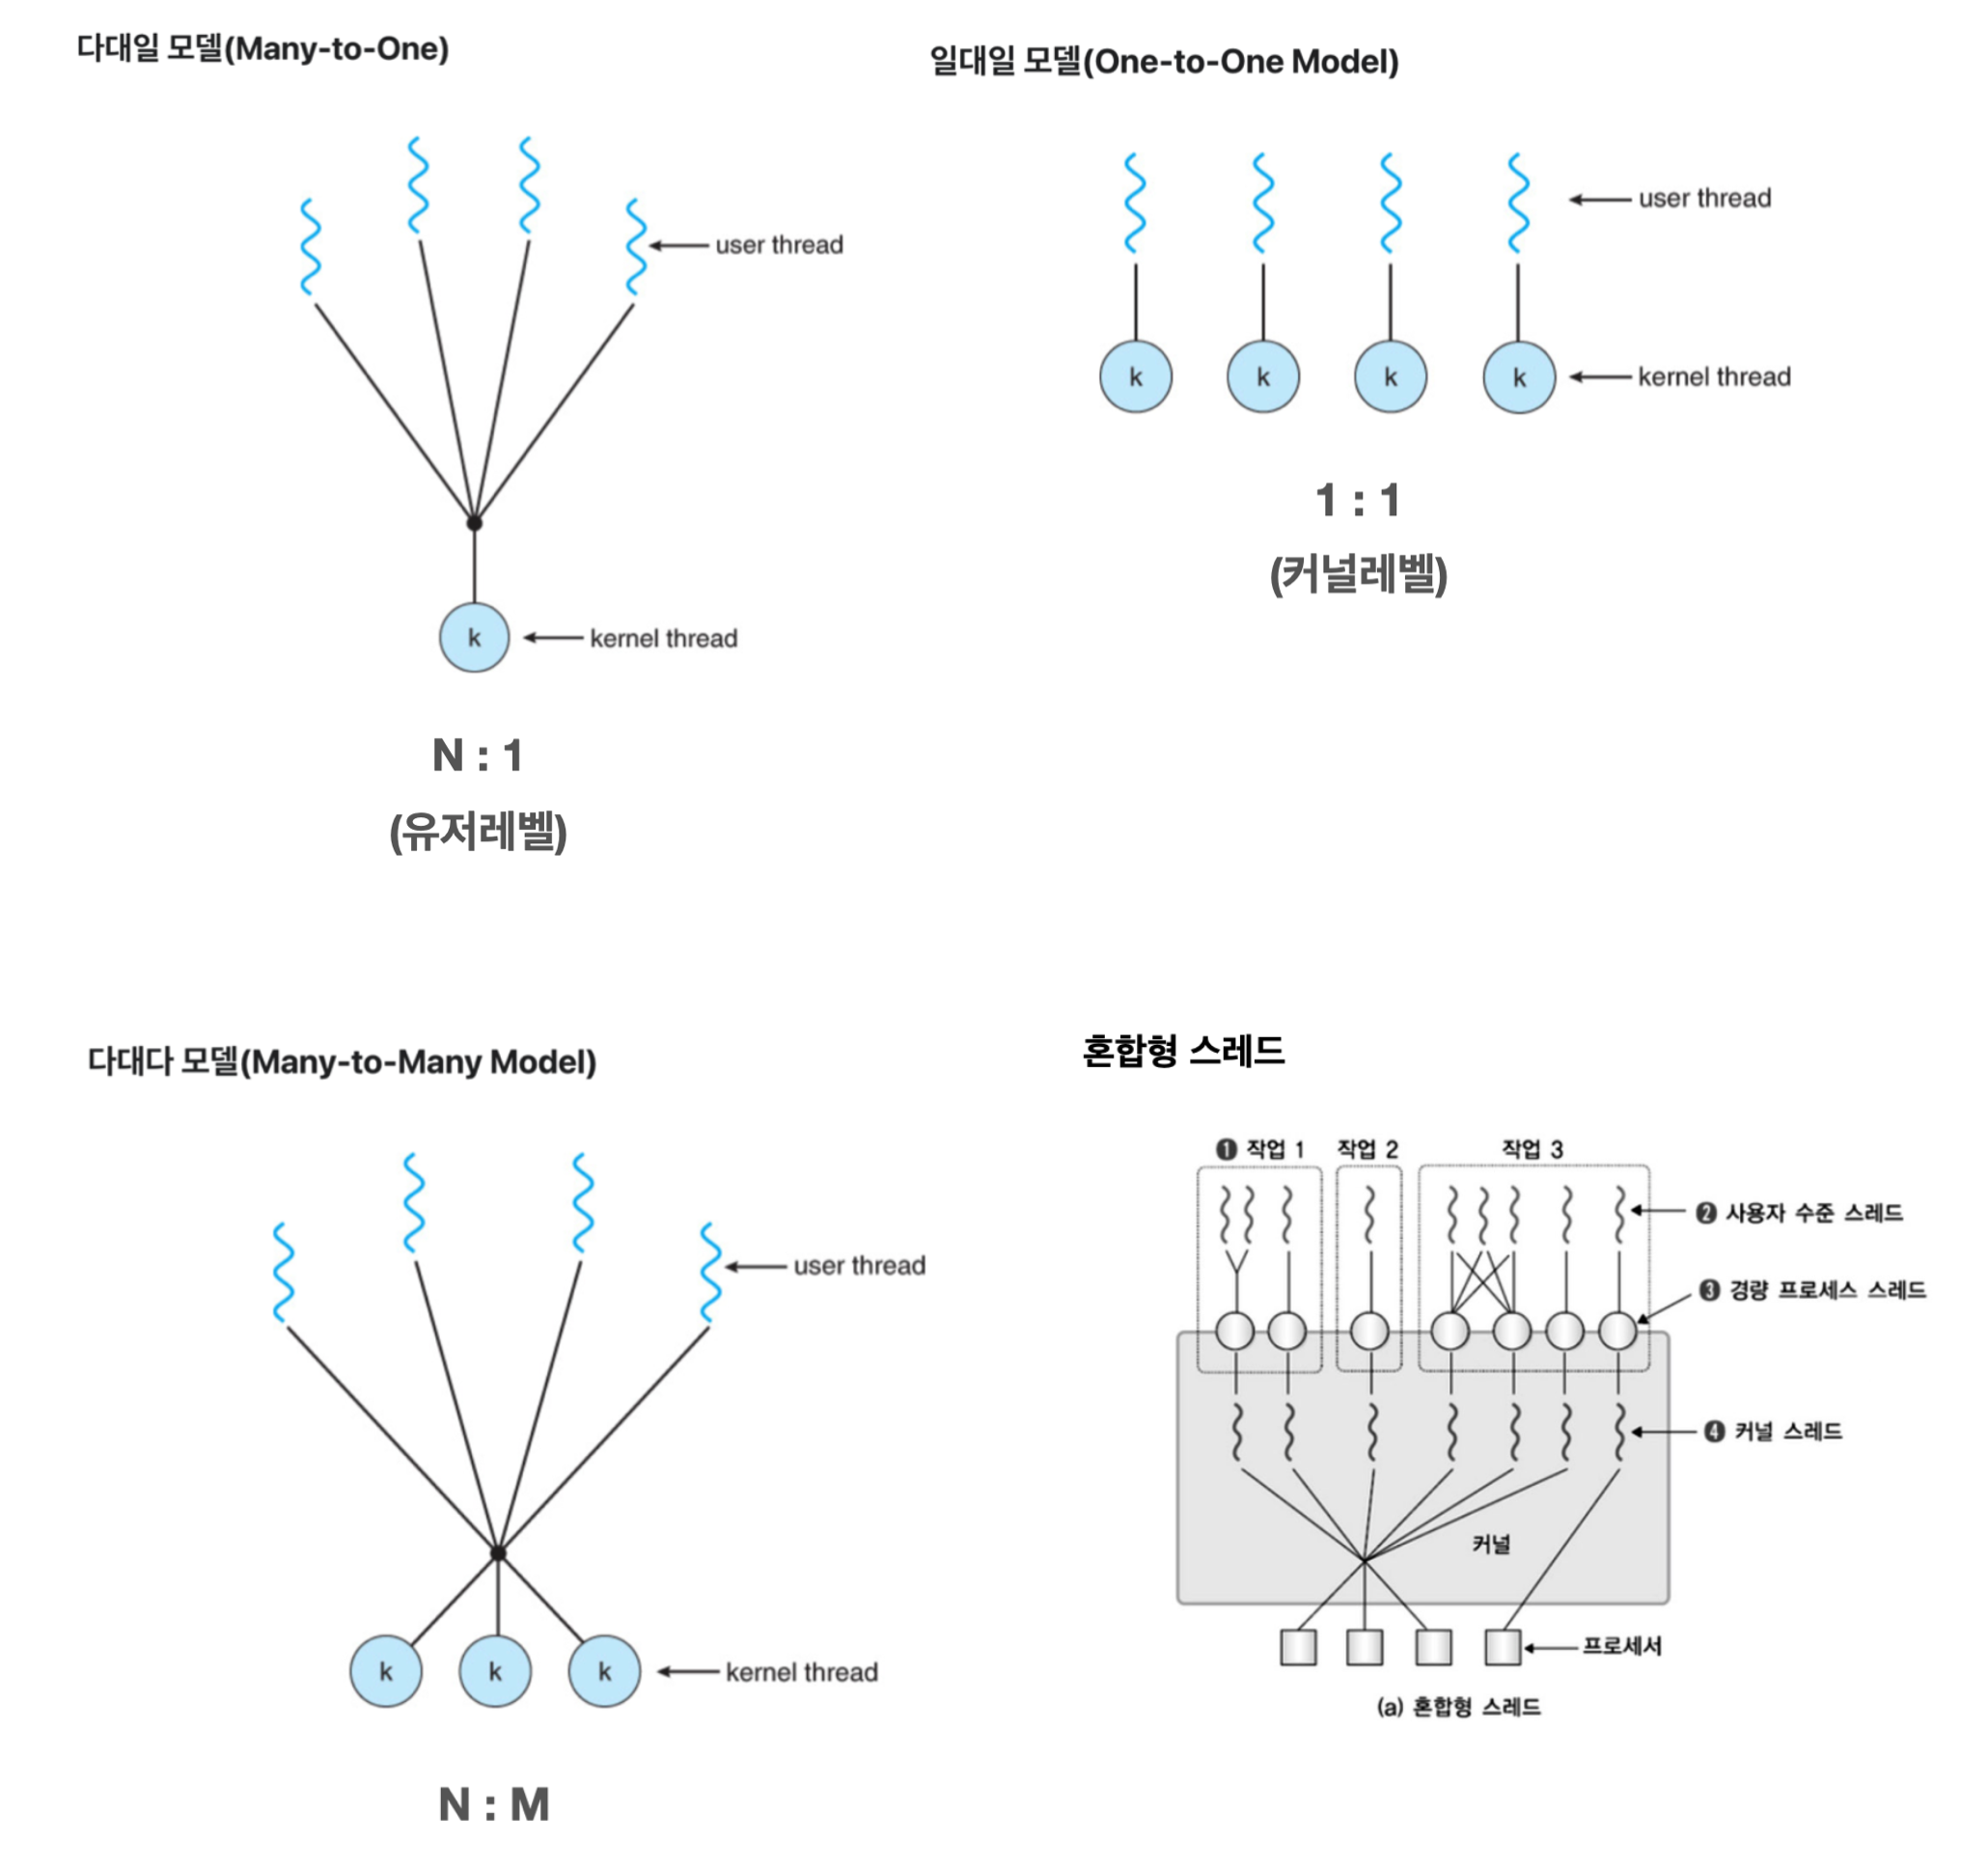

사용자 수준 스레드와 커널 수준 스레드에 얘기하기 전에, 멀티 스레드 모델을 먼저 이해하는 것이 좋다. 멀티 스레드 모형이 위와 같이 존재하고, 어떤 멀티 스레드 모델을 사용하느냐에 따라서, 다르게 동작하기 때문에 사용자/커널 수준 스레드 차이가 발생하는 것이다. 추가적으로, 다대다 모델과 일대일 모델과 다대일 모델을 모두 채택하여 사용하는 경우가 있는데, 이를 혼합형 모델이라고 한다.

**사용자/커널 수준 스레드 구조 차이**

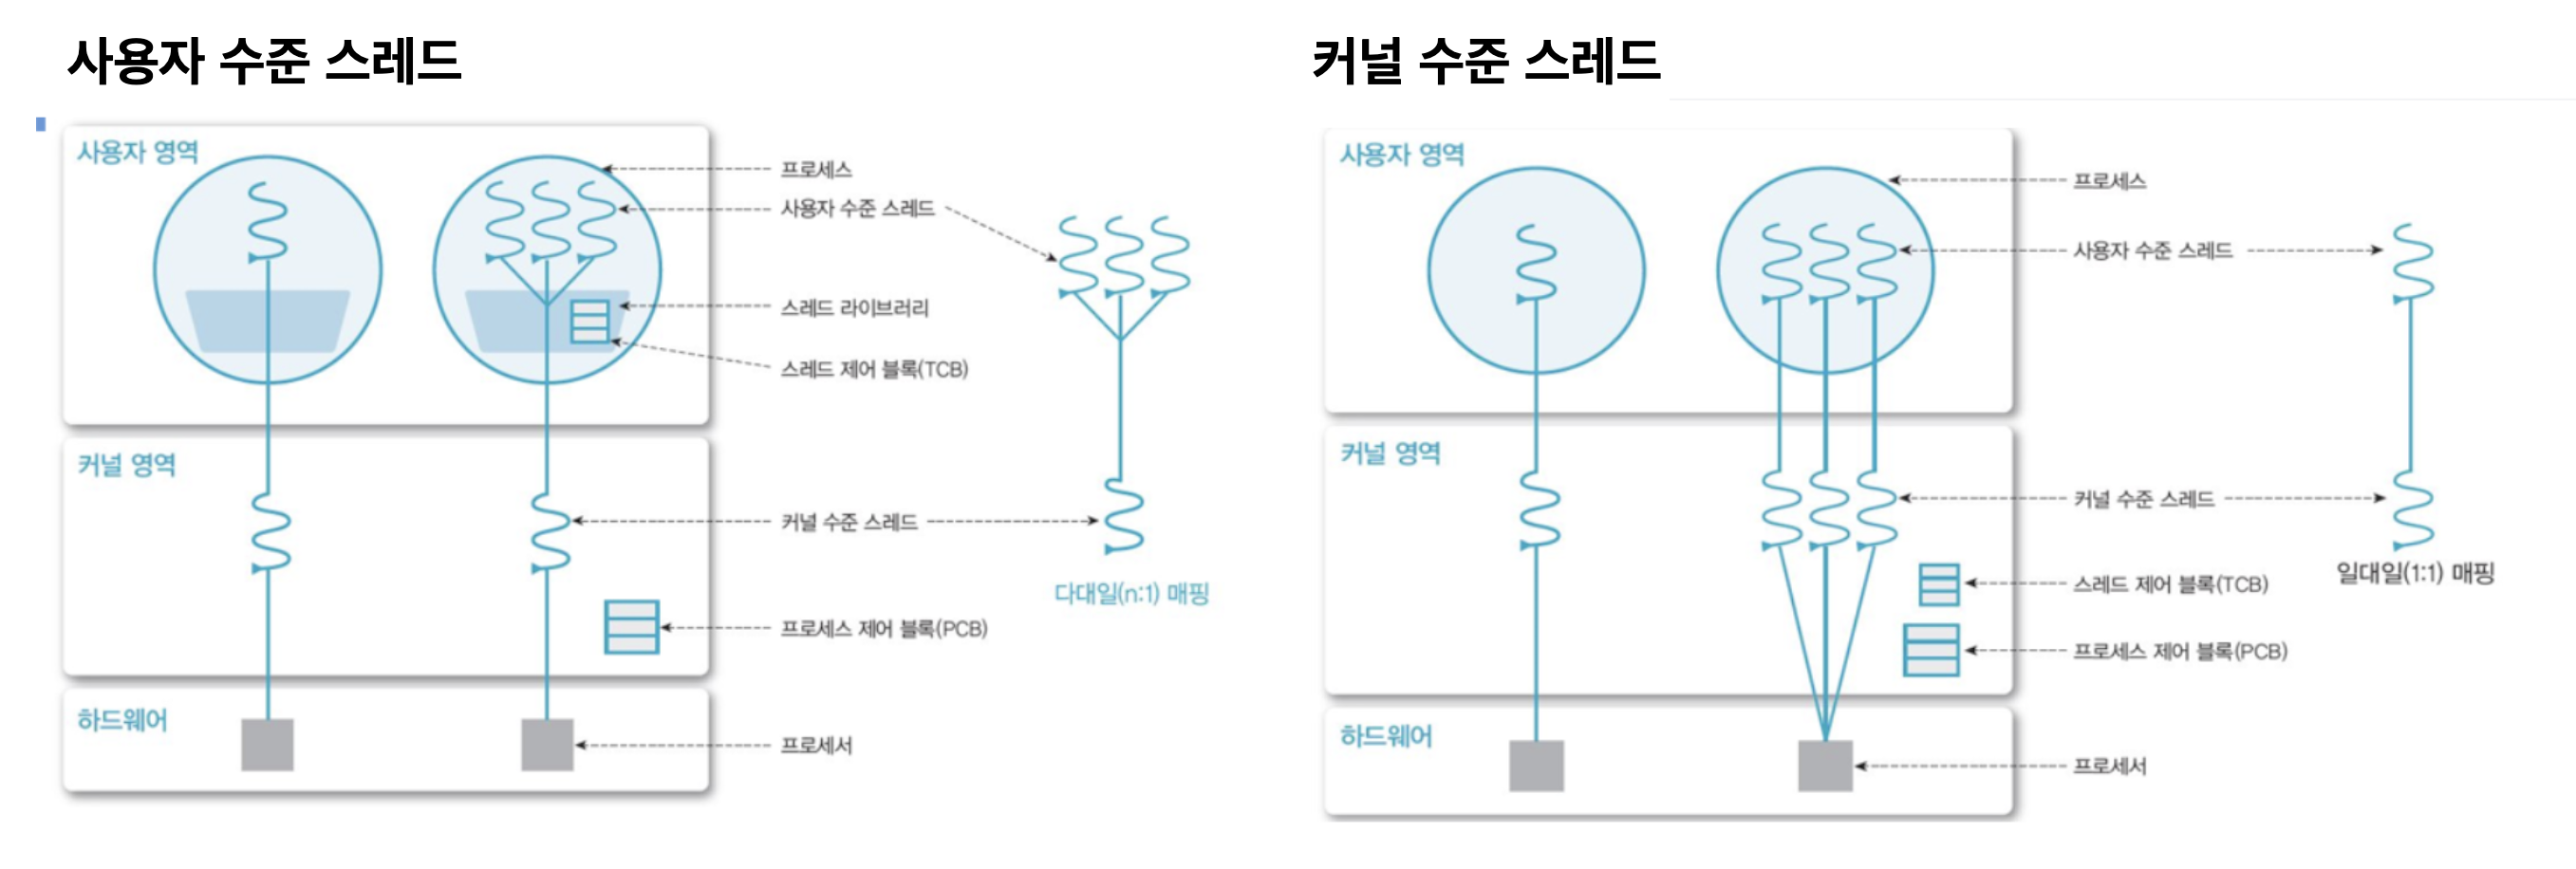

**스레드를 생성하는 방법**

kernel의 지원없이 완전히 user space에서만 library를 제공하는 방법: 라이브러리의 함수를 호출하는 것은 시스템 호출이 아니라 사용자 공간의 지역함수를 호출한다.
운영체제에 의해 kernel space에서 구현하는 방법: 라이브러리 API를 호출하는 것은 kernel system call을 사용한다